In [199]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [200]:
class GA:
    def __init__(self, seed=0, pop_size=100, num_genes=20, mutation_rate=0, cross_rate=0, max_iter=100):
        self.pop_size = pop_size
        self.num_genes = num_genes
        self.mutation_rate = mutation_rate
        self.cross_rate = cross_rate
        self.max_iter = max_iter

        np.random.seed(seed=seed)


    def create_one_individual(self):
        return np.random.randint(0, 2, self.num_genes)

    def init(self):
        pop = [self.create_one_individual() for _ in range(self.pop_size)]
        return pop
    
    def fitness(self):
        pass

    def decoder(self, v):
        return (v, )

    def __call__(self):
        pop = self.init()

        fitl = []
        best_keep = []

        for _ in range(self.max_iter):
            ppop = []

            self.selection(pop)  # init self.pl

            for _ in range(self.pop_size):
                v = self.selection(pop, mute=False)
                ppop.append(v)

            pop = ppop
            ppop = []
            self.selection(pop)  # init self.pl
            for _ in range(self.pop_size // 2):
                r = np.random.random()

                v1 = self.selection(pop, mute=False)
                v2 = self.selection(pop, mute=False)
                if r < self.cross_rate:
                    vv1, vv2 = self.crossover(v1, v2)
                    ppop.append(vv1)
                    ppop.append(vv2)
                else:
                    ppop.append(v1)
                    ppop.append(v2)

            if self.pop_size % 2:
                ppop.append(self.selection(pop, mute=False))  # if pop_size is odd, the last one will not be mutated

            for v in ppop:  # mutate
                v = self.mutate(v)

            pop = ppop
            pop = sorted(pop, key=lambda v: self.fitness(*self.decoder(v)), reverse=True)  # sort

            vbest = pop[0]  # get the best in one generation
            fbest = self.fitness(*self.decoder(vbest))
            best_keep.append(vbest)

            fitl.append(fbest)

        pop = best_keep
        pop = sorted(pop, key=lambda v: self.fitness(*self.decoder(v)), reverse=True)  # sort

        vbest = pop[0]  # get the best in all generations

        return vbest, fitl

    def selection(self, pop, mute=True):
        if mute:
            fl = []
            for v in pop:
                f = self.fitness(*self.decoder(v))
                fl.append(f)

            fl = np.array(fl)
            fl = np.exp(fl)
            fl = fl / np.sum(fl)  # softmax

            self.pl = [np.sum(fl[:i]) for i in range(len(fl))]

        r = np.random.random()
        for i in range(len(self.pl)):
            if self.pl[i] > r:
                return pop[i]
        
        return pop[-1]
                    
    def crossover(self, v1, v2):
        r = np.random.randint(0, self.num_genes)
        vv1 = np.zeros(self.num_genes)
        vv2 = np.zeros(self.num_genes)

        vv1[:r] = v1[:r]
        vv1[r:] = v2[r:]

        vv2[:r] = v2[:r]
        vv2[r:] = v1[r:]

        return vv1, vv2

    def mutate(self, v):
        for i in range(self.num_genes):
            if np.random.random() < self.mutation_rate:
                v[i] = 1 - v[i]

        return v


In [201]:
class GA1(GA):
    def __init__(self, seed=0, pop_size=100, num_genes=20, mutation_rate=0, cross_rate=0, max_iter=100):
        super().__init__(seed, pop_size, num_genes, mutation_rate, cross_rate, max_iter)

    def create_one_individual(self):
        return np.random.randint(0, 2, self.num_genes)
    
    def decoder(self, v):
        decx = v[0:len(v)//2]
        decy = v[len(v)//2:]

        # decx = []
        # decy = []
        # for i in range(len(v)):
        #     if i%2 == 0:
        #         decx.append(v[i])
        #     else:
        #         decy.append(v[i])
                
        x = np.dot(np.array([2**i for i in range(len(decx))]), decx)
        y = np.dot(np.array([2**i for i in range(len(decy))]), decy)

        # scale to [-2, 2]
        dx = 2**(len(decx) - 1)
        x = (x - dx) / (dx) * 2
        dy = 2**(len(decy) - 1)
        y = (y - dy) / (dy) * 2
        return x, y

    def fitness(self, X, Y):
        return X*np.cos(2*np.pi*Y) + Y*np.sin(2*np.pi*X)

[1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1.76171875, -2.0)
3.7562996633573804
3.7563359221353894


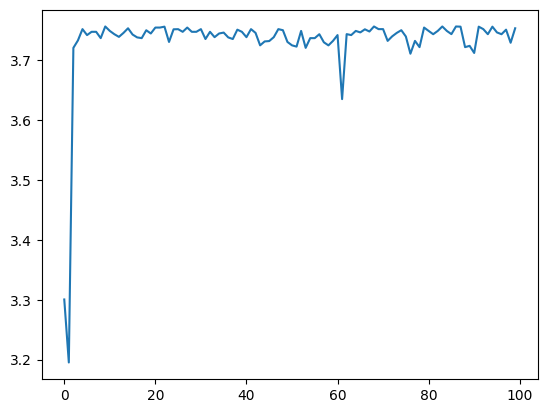

In [211]:
GAr = None

vb = None
vf = None
cost = -np.inf
for _ in range(10):
    # GAr = GA1(seed=np.random.randint(0, 100000), pop_size=500, mutation_rate=0.05, cross_rate=0.7, max_iter=100, num_genes=25)
    GAr = GA1(seed=np.random.randint(0, 100000), pop_size=100, mutation_rate=0.05, cross_rate=0.7, max_iter=100, num_genes=20)
    vbest, fitl = GAr()
    ccost = GAr.fitness(*GAr.decoder(vbest))

    if ccost > cost:
        vb = vbest
        vf = fitl
        cost = ccost

print(vb)
print(GAr.decoder(vb))
print(cost)
print(f'{GAr.fitness(1.76267854, -2)}')
plt.plot(range(len(vf)), vf)
plt.show()

In [203]:
x = [ 116.46 ,117.2 ,121.48 ,106.54 ,91.11 ,87.98 ,106.27 ,111.65 ,108.33 ,126.63 ]
y = [ 39.92 ,39.13 ,31.22 ,29.59 ,29.97 ,43.77 ,38.47 ,40.82 ,22.84 ,45.75 ] 
dist = {
    0: '北京',
    1: '天津',
    2: '上海',
    3: '重庆', 
    4: '拉萨',
    5: '乌鲁木齐',
    6: '银川',
    7: '呼和浩特',
    8: '南宁',
    9: '哈尔滨'
}

DIS = [[0 for _ in range(len(x))] for _ in range(len(x))]

for i in range(len(x)):
    for j in range(len(x)):
       DIS[i][j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

In [204]:
class GA2(GA):
    def __init__(self, seed=0, pop_size=100, num_genes=20, mutation_rate=0, cross_rate=0, max_iter=100):
        super().__init__(seed, pop_size, num_genes, mutation_rate, cross_rate, max_iter)

    def decoder(self, v):
        return (v, )  # return a tuple is must here

    def fitness(self, v):
        sum = 0
        for i in range(-1, self.num_genes - 1):
            sum += DIS[int(v[i])][int(v[i + 1])]

        sum /= 1e4
        return -sum

    def create_one_individual(self):
        return np.random.permutation(self.num_genes)

    def crossover(self, v1, v2):
        r = np.random.randint(0, self.num_genes)
        vv1 = np.zeros(self.num_genes)
        vv2 = np.zeros(self.num_genes)

        vv1[:r] = v1[:r]
        rr = r
        for x in v2:
            if x not in vv1:
                vv1[rr] = x
                rr += 1
                if rr == self.num_genes:
                    break

        vv2[:r] = v2[:r]
        rr = r
        for x in v1:
            if x not in vv2:
                vv2[rr] = x
                rr += 1
                if rr == self.num_genes:
                    break

        return vv1, vv2

    def mutate(self, v):
        for i in range(self.num_genes):
            if np.random.random() < self.mutation_rate:
                j = np.random.randint(0, self.num_genes)
                v[i], v[j] = v[j], v[i]

[1. 9. 2. 8. 3. 4. 5. 6. 7. 0.]
109.98824625831298


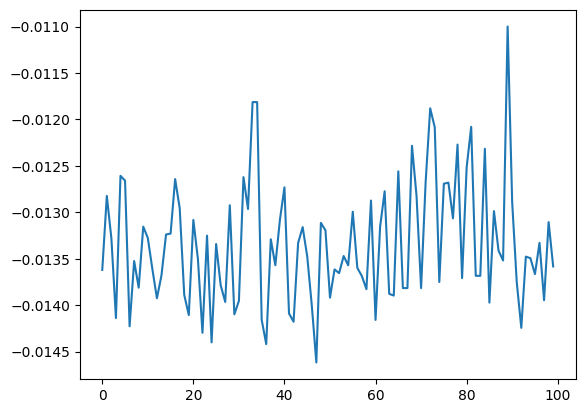

天津 -> 哈尔滨 -> 上海 -> 南宁 -> 重庆 -> 拉萨 -> 乌鲁木齐 -> 银川 -> 呼和浩特 -> 北京 -> 

In [209]:
GAr = None

vb = None
vf = None
cost = -np.inf
for _ in range(10):
    GAr = GA2(seed=np.random.randint(0, 1e5), pop_size=300, mutation_rate=0.05, cross_rate=0.5, max_iter=100, num_genes=10)
    vbest, fitl = GAr()
    ccost = GAr.fitness(*GAr.decoder(vbest))

    if ccost > cost:
        vb = vbest
        vf = fitl
        cost = ccost

print(vb)
print(-cost*1e4)
plt.plot(range(len(vf)), vf)
plt.show()

for i in vb: 
    print(dist[i], end=' -> ')